In [64]:
import etl_eda
import importlib
importlib.reload(etl_eda)
from etl_eda import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest, normaltest, spearmanr
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df_train = load('train.csv')
df_item_categories = load('item_categories.csv')
df_shops = load('shops.csv')
df_items  = load('items.csv')

In [3]:
df_train.describe()

,date_block_num,shop_id,item_id,item_cnt_month,item_price
count,4.247423e+07,4.247423e+07,4.247423e+07,4.247423e+07,4.247423e+07
mean,1.658825e+01,3.086360e+01,1.109853e+04,8.581759e-02,2.995519e+01
std,9.864140e+00,1.666801e+01,6.396251e+03,1.696772e+00,3.343246e+02
min,0.000000e+00,2.000000e+00,0.000000e+00,-2.200000e+01,0.000000e+00
25%,8.000000e+00,1.700000e+01,5.550000e+03,0.000000e+00,0.000000e+00
50%,1.700000e+01,3.100000e+01,1.110600e+04,0.000000e+00,0.000000e+00
75%,2.500000e+01,4.500000e+01,1.664400e+04,0.000000e+00,0.000000e+00
max,3.400000e+01,5.900000e+01,2.216900e+04,1.644000e+03,5.099900e+04


ITEM_CNT_MONTH

In [4]:
df_train.loc[df_train['item_cnt_month'] < 0, 'item_cnt_month'].count()

np.int64(915)

Item_cnt_month must be negative

In [5]:
df_train.loc[df_train['item_cnt_month'] < 0, 'item_cnt_month'] = np.multiply(df_train.loc[df_train['item_cnt_month'] < 0, 'item_cnt_month'],(-1))

Item_cnt_month destribution

<Figure size 1000x600 with 0 Axes>

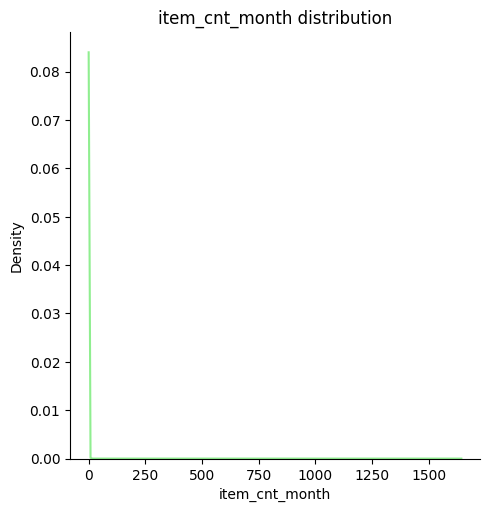

In [6]:
distribution_plot(df_train, 'item_cnt_month')

Visually, our distribution is not normal. 
Let's try to test this hypothesis using the calculated criteria

Normal destribution hypothesis check: item_cnt_month
H0: sales are not normally distributed
H1: sales are normally distributed
Criteria: Kolmogorova-Smornova

In [7]:
kolmogorov_test(df_train, 'item_cnt_month')

Kolmogorov-Smirnov Test: Statistic = 0.5, p-value = 0.000
item_cnt_month do not have normal destribution. Ho hypothesis accepted


Outliers detection

In [8]:
outliers = outlier_detection_eda(df_train, 'item_cnt_month')
outliers.item_cnt_month.describe()

count    1.606539e+06
mean     2.270106e+00
std      8.435536e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.644000e+03
Name: item_cnt_month, dtype: float64

In [9]:
df_train.loc[df_train.item_cnt_month == 0]['item_cnt_month'].count()

np.int64(40867689)

We have sparse data - so outliers is not true outliers
If we take data for definite item_id, shop_id - we will see that they form full range of time data with only one object per date block. So, deletion of this data can cause troubles in future predictions

In [10]:
#For example
df_train[(df_train.shop_id == 59) & (df_train.item_id == 20949)]

,date_block_num,shop_id,item_id,item_cnt_month,item_price
1241737,0,59,20949,0.0,0.000000
2484679,1,59,20949,0.0,0.000000
3727621,2,59,20949,0.0,0.000000
4970563,3,59,20949,25.0,5.000000
6213505,4,59,20949,116.0,5.000000
7456447,5,59,20949,123.0,4.993333
8699389,6,59,20949,109.0,4.989247
9942331,7,59,20949,94.0,4.991071
11185273,8,59,20949,122.0,5.000000
12428215,9,59,20949,106.0,5.000000


Outliers specification

In [11]:
outliers_spec(outliers, 'item_cnt_month', 10, df_item_categories, df_items)

Категория: Игры PC - Стандартные издания
item_cnt_month:
['Crew [PC, русская версия]',           date_block_num  item_cnt_month
41499187              33            15.0
41630023              33            12.0]

Категория: Программы - Для дома и офиса
item_cnt_month:
['Kaspersky Internet Security для Android Russian Edition. 1 Device 1 year Base Card',           date_block_num  item_cnt_month
41173845              33           194.0]

Категория: Игры PC - Дополнительные издания
item_cnt_month:
['Ведьмак 3: Дикая Охота - Дополнение "Каменные Сердца" (код загрузки, без диска) [PC, русская версия]',           date_block_num  item_cnt_month
41027091              33            28.0
41048897              33            14.0
41070703              33            16.0
41114315              33            78.0
41136121              33            14.0
41201539              33            17.0
41223345              33            51.0
41266957              33            31.0
41288763              33   

As we see - we do not have anomalies, all data can correspond to the real-world data
But we can transform our 'item_cnt_month'

In [12]:
df_train['item_cnt_month_log'] = np.log1p(df_train['item_cnt_month'])

<Figure size 1000x600 with 0 Axes>

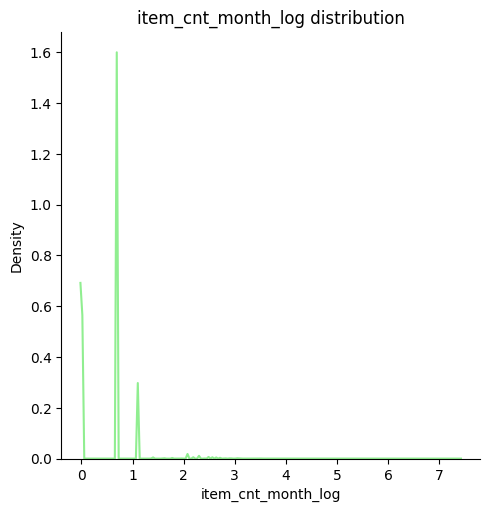

In [13]:
distribution_plot(df_train, 'item_cnt_month_log')

In [14]:
kolmogorov_test(df_train, 'item_cnt_month_log')

Kolmogorov-Smirnov Test: Statistic = 0.5, p-value = 0.000
item_cnt_month_log do not have normal destribution. Ho hypothesis accepted


In [15]:
df_train.item_cnt_month_log.describe()

count    4.247423e+07
mean     3.625824e-02
std      2.060789e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.405496e+00
Name: item_cnt_month_log, dtype: float64

The picture of distribution look better, standart deviation also decreased: from 1.696772e+00 to 2.060789e-01

ITEM_CNT_MONTH

In [16]:
df_train[df_train.item_price < 0]

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_month_log


<Figure size 1000x600 with 0 Axes>

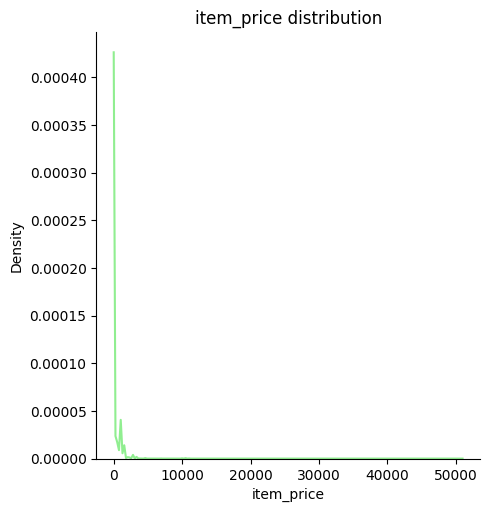

In [17]:
distribution_plot(df_train, "item_price")

In [18]:
kolmogorov_test(df_train, 'item_price')

Kolmogorov-Smirnov Test: Statistic = 0.5, p-value = 0.000
item_price do not have normal destribution. Ho hypothesis accepted


In [19]:
outliers = outlier_detection_eda(df_train, 'item_price')
outliers.item_price.describe()

count    1.609122e+06
mean     7.906943e+02
std      1.532592e+03
min      9.000000e-02
25%      1.990000e+02
50%      3.990000e+02
75%      8.985000e+02
max      5.099900e+04
Name: item_price, dtype: float64

In [20]:
outliers_spec(outliers, 'item_price', 2000, df_item_categories, df_items)

Категория: Игры - PS3
item_price:
['Just Dance 2016 (только для PS Move) [PS3, русская версия]',           date_block_num  item_price
41369954              33      2499.0
41500790              33      2499.0
41566208              33      2499.0
41631626              33      2499.0
41849686              33      2499.0
42002328              33      2499.0]

Категория: Программы - 1С:Предприятие 8
item_price:
['1С:Предприниматель 2015',           date_block_num  item_price
36569438              29      3000.0
36896528              29      3300.0
37485290              30      3300.0
38270306              30      3300.0
38728232              31      3300.0
39077128              31      3300.0
39382412              31      3300.0
39971174              32      3300.0
40385488              32      3300.0
40472712              32      3300.0
40734384              32      3300.0
41017862              33      3300.0
41214116              33      3300.0
41628430              33      3300.0]

Катег

In [21]:
df_train['item_price_log'] = np.log1p(df_train['item_price'])

<Figure size 1000x600 with 0 Axes>

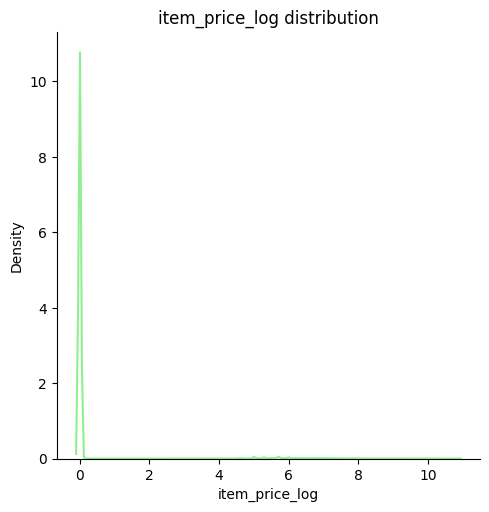

In [22]:
distribution_plot(df_train, 'item_price_log')

In [23]:
df_train.item_price_log.describe()

count    4.247423e+07
mean     2.302365e-01
std      1.176952e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.083958e+01
Name: item_price_log, dtype: float64

We have the same situation as with item_cnt_month
standart deviation decrease: from 3.343246e+02 to 1.176952e+00

Item_cnt_month performance during each time period

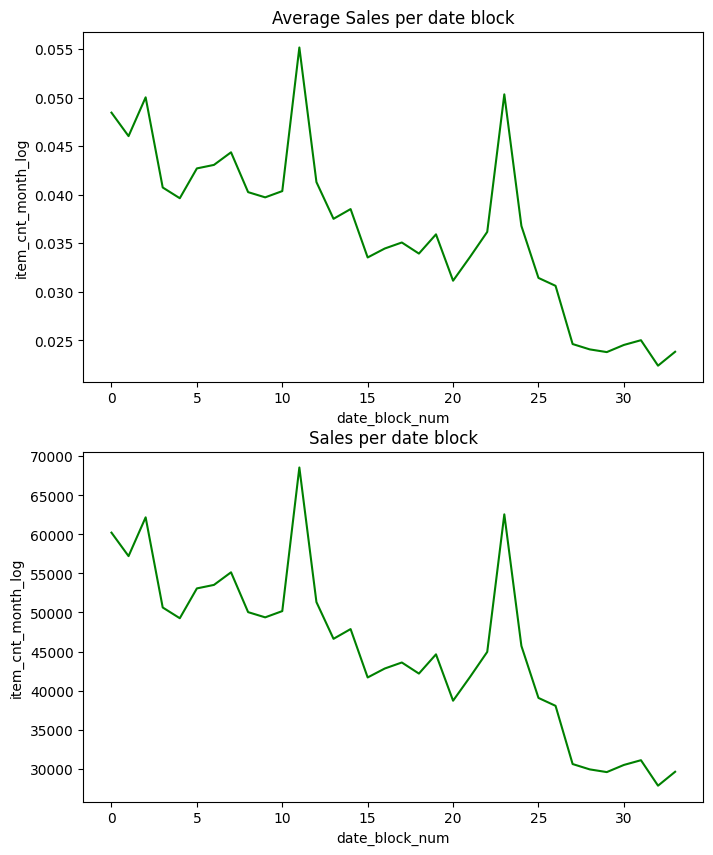

In [24]:
figure, ax = plt.subplots(2, 1, figsize = (8,10))

sns.lineplot(data = df_train.loc[df_train['date_block_num'] < 34].groupby('date_block_num').agg({'item_cnt_month_log': 'mean'}), x = 'date_block_num', y = 'item_cnt_month_log', c = 'g', ax = ax[0]).set_title('Average Sales per date block')

sns.lineplot(data = df_train.loc[df_train['date_block_num'] < 34].groupby('date_block_num').agg({'item_cnt_month_log': 'sum'}), x = 'date_block_num', y = 'item_cnt_month_log', c = 'g', ax = ax[1]).set_title('Sales per date block')

plt.show()

Time-influenced features engineering

In [25]:
group = df_train.groupby('date_block_num').agg({'item_cnt_month_log':['sum', 'mean']})
group = group.reset_index()
group['date'] = pd.date_range(start='2013-01-01', periods=35, freq='ME')
group['month'] = group['date'].dt.month
group['year'] = group['date'].dt.year
group.head()

date_block_num item_cnt_month_log                 date month  year
                                sum      mean                       
0              0       60214.853279  0.048445 2013-01-31     1  2013
1              1       57211.057757  0.046029 2013-02-28     2  2013
2              2       62174.577721  0.050022 2013-03-31     3  2013
3              3       50636.383487  0.040739 2013-04-30     4  2013
4              4       49261.175075  0.039633 2013-05-31     5  2013

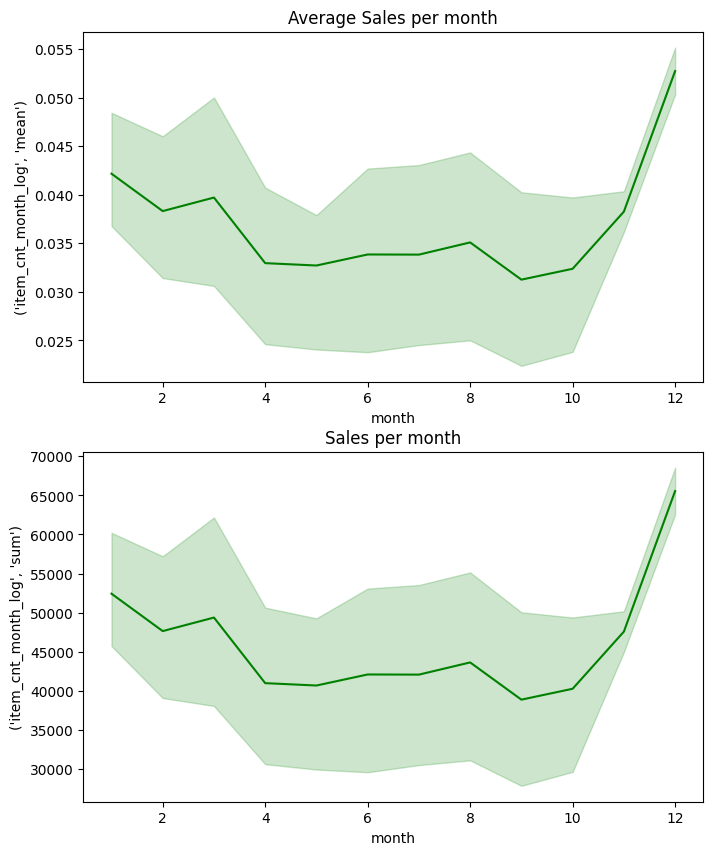

In [26]:
figure, ax = plt.subplots(2, 1, figsize = (8,10))

sns.lineplot(data = group.loc[group['date_block_num'] < 34], x = 'month', y = ('item_cnt_month_log', 'mean'), c = 'g', ax = ax[0]).set_title('Average Sales per month')

sns.lineplot(data = group.loc[group['date_block_num'] < 34], x = 'month', y = ('item_cnt_month_log', 'sum'), c = 'g', ax = ax[1]).set_title('Sales per month')

plt.show()

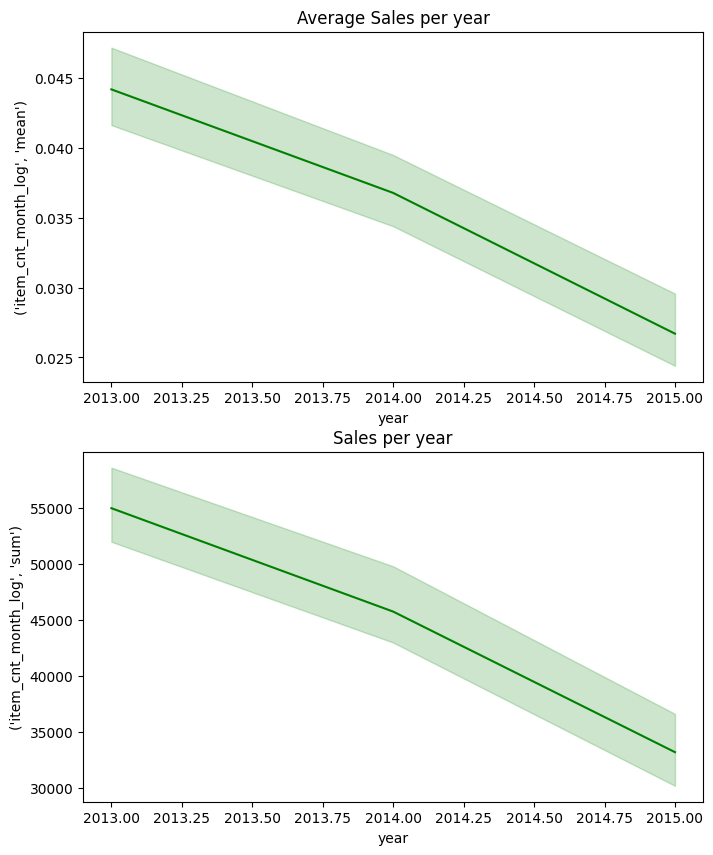

In [27]:
figure, ax = plt.subplots(2, 1, figsize = (8,10))

sns.lineplot(data = group.loc[group['date_block_num'] < 34], x = 'year', y = ('item_cnt_month_log', 'mean'), c = 'g', ax = ax[0]).set_title('Average Sales per year')

sns.lineplot(data = group.loc[group['date_block_num'] < 34], x = 'year', y = ('item_cnt_month_log', 'sum'), c = 'g', ax = ax[1]).set_title('Sales per year')

plt.show()

As we have correlation of new features 'month' and 'year' with our target, it will be reasonable to add them in our df

In [28]:
group = group[['date_block_num', 'month', 'year']]

In [32]:
df_train = pd.merge(df_train, group, on = 'date_block_num', how = 'left')

Shop_id - target dependence

In [34]:
encoder = LabelEncoder()

In [35]:
group = df_train.groupby('shop_id').agg({'item_cnt_month_log':['sum', 'mean']}).reset_index()
group['shop_id_encoded'] = encoder.fit_transform(group['shop_id'])
group.head()

shop_id item_cnt_month_log           shop_id_encoded
                         sum      mean                
0       2       14397.701558  0.019287               0
1       3       14675.222961  0.019659               1
2       4       21165.202454  0.028352               2
3       5       21433.211407  0.028711               3
4       6       44110.317940  0.059089               4

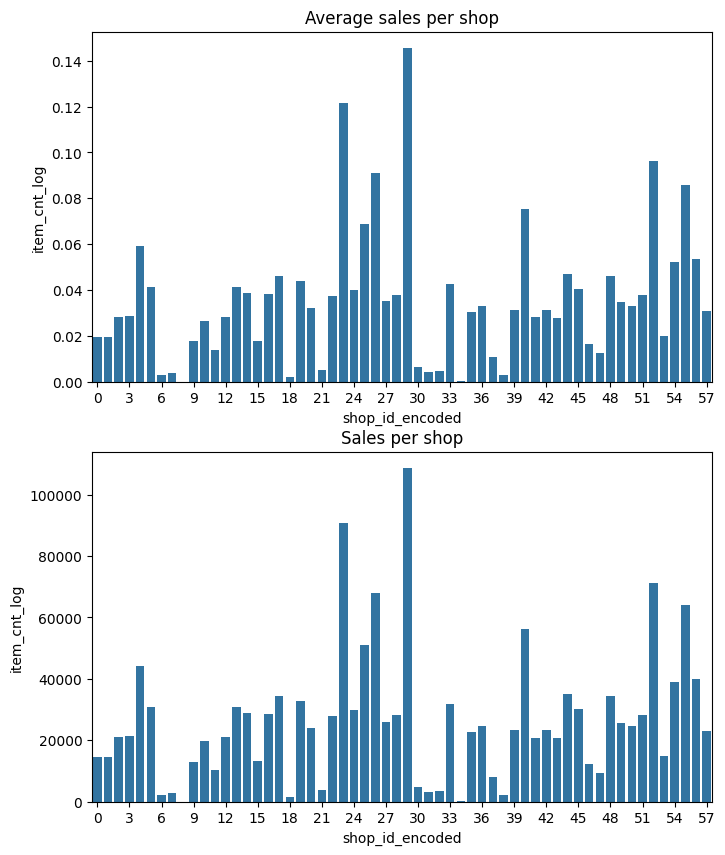

In [36]:
figure, ax = plt.subplots(2, 1, figsize = (8,10))

length = len(group) + 1

sns.barplot(x = group['shop_id_encoded'], y = group['item_cnt_month_log', 'mean'], ax = ax[0]).set_title('Average sales per shop')

sns.barplot(x = group['shop_id_encoded'], y = group['item_cnt_month_log', 'sum'], ax = ax[1]).set_title('Sales per shop')

ax[0].set_ylabel('item_cnt_log')
ax[1].set_ylabel('item_cnt_log')

plt.setp(ax, xticks=np.arange(0, length, 3), xticklabels=np.arange(0, length, 3),)
plt.show()

In [37]:
df_train['shop_id_encoded'] = encoder.fit_transform(df_train['shop_id'])

We have for each shop id, but in one city could be several shops(creating new feature)

In [38]:
df_shops['city'] = df_shops['shop_name'].str.split(' ').apply(lambda x: x[0])
df_shops['city_id'] = encoder.fit_transform(df_shops['city'])
df_shops['shop_id_encoded'] = encoder.fit_transform(df_shops['shop_id'])
df_shops.head()

,shop_name,shop_id,city,city_id,shop_id_encoded
0,"Якутск Орджоникидзе, 56 фран",0,Якутск,29,0
1,"Якутск ТЦ ""Центральный"" фран",1,Якутск,29,1
2,"Адыгея ТЦ ""Мега""",2,Адыгея,0,2
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,1,3
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,2,4


In [39]:
group = df_train.groupby('shop_id_encoded').agg({'item_cnt_month_log':'sum'})
group = group.reset_index()
group = pd.merge(group, df_shops, on = 'shop_id_encoded', how = 'left')
group.head()

,shop_id_encoded,item_cnt_month_log,shop_name,shop_id,city,city_id
0,0,14397.701558,"Якутск Орджоникидзе, 56 фран",0,Якутск,29
1,1,14675.222961,"Якутск ТЦ ""Центральный"" фран",1,Якутск,29
2,2,21165.202454,"Адыгея ТЦ ""Мега""",2,Адыгея,0
3,3,21433.211407,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,1
4,4,44110.317940,"Волжский ТЦ ""Волга Молл""",4,Волжский,2


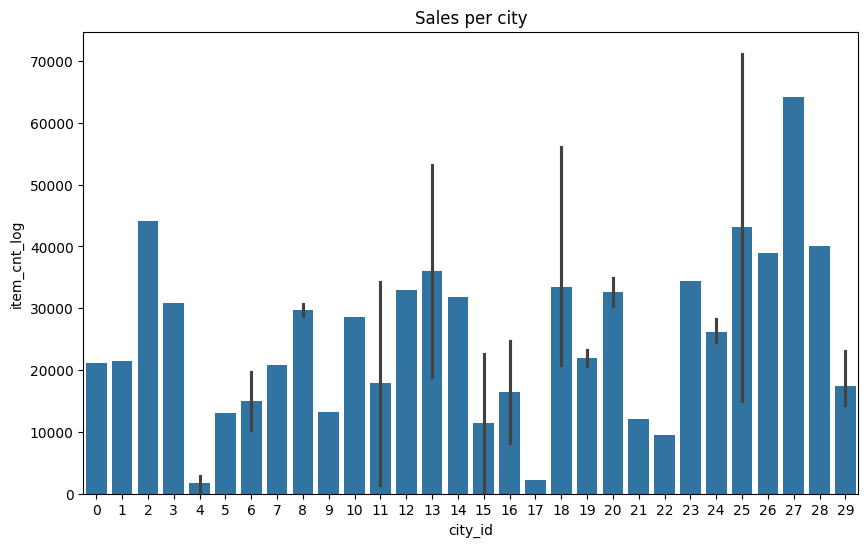

In [40]:
plt.figure(figsize=(10,6))

length = len(group) + 1

sns.barplot(x = group['city_id'], y = group['item_cnt_month_log']).set_title('Sales per city')

plt.ylabel('item_cnt_log')

plt.setp(ax, xticks=np.arange(0, length, 3), xticklabels=np.arange(0, length, 3),)
plt.show()

We also have dependence between city_id and target

In [41]:
group = group[['shop_id_encoded', 'city_id']]
df_train = pd.merge(df_train, group, on = 'shop_id_encoded', how = 'left')
df_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_month_log,item_price_log,month,year,shop_id_encoded,city_id
0,0,2,0,0.0,0.0,0.0,0.0,1,2013,0,29
1,0,2,1,0.0,0.0,0.0,0.0,1,2013,0,29
2,0,2,2,0.0,0.0,0.0,0.0,1,2013,0,29
3,0,2,3,0.0,0.0,0.0,0.0,1,2013,0,29
4,0,2,4,0.0,0.0,0.0,0.0,1,2013,0,29


Item-price dependence

In [42]:
group = df_train.groupby(['date_block_num', 'shop_id', 'item_id']).agg({'item_cnt_month_log': 'sum', 'item_price_log': 'mean'}).reset_index()
group.head()

,date_block_num,shop_id,item_id,item_cnt_month_log,item_price_log
0,0,2,0,0.0,0.0
1,0,2,1,0.0,0.0
2,0,2,2,0.0,0.0
3,0,2,3,0.0,0.0
4,0,2,4,0.0,0.0


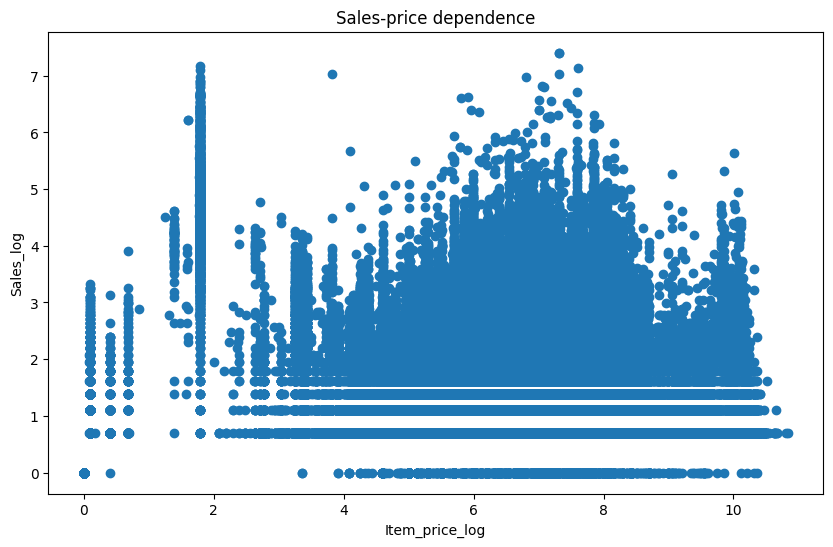

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(x = group['item_price_log'],
            y = group['item_cnt_month_log'])

plt.xlabel('Item_price_log')
plt.ylabel('Sales_log')
plt.title('Sales-price dependence')

plt.show()

We do not have strong correlation between item price and Sales

As our need to predict Item_cnt_per_month, it will be reasonable to creature feature that will illustrate month dinamics on item_price base

In [44]:
group = df_train[['item_price', 'item_cnt_month', 'date_block_num', 'shop_id', 'item_cnt_month_log']]
group['revenue'] = (group.item_price * group.item_cnt_month)
group.head()

C:\Users\User\AppData\Local\Temp\ipykernel_199200\3358020166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['revenue'] = (group.item_price * group.item_cnt_month)


,item_price,item_cnt_month,date_block_num,shop_id,item_cnt_month_log,revenue
0,0.0,0.0,0,2,0.0,0.0
1,0.0,0.0,0,2,0.0,0.0
2,0.0,0.0,0,2,0.0,0.0
3,0.0,0.0,0,2,0.0,0.0
4,0.0,0.0,0,2,0.0,0.0


<Figure size 1000x600 with 0 Axes>

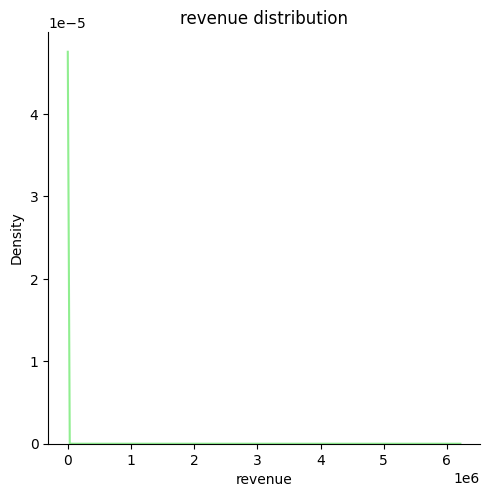

In [45]:
distribution_plot(group, 'revenue')

In [46]:
group['revenue_log'] = np.log1p(group['revenue'])

C:\Users\User\AppData\Local\Temp\ipykernel_199200\650943199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['revenue_log'] = np.log1p(group['revenue'])


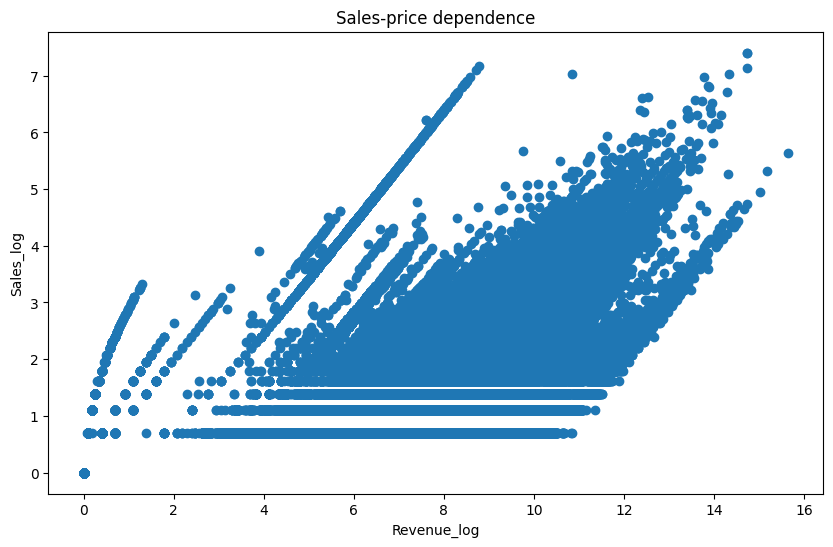

In [47]:
plt.figure(figsize=(10,6))
plt.scatter(x = group['revenue_log'],
            y = group['item_cnt_month_log'])

plt.xlabel('Revenue_log')
plt.ylabel('Sales_log')
plt.title('Sales-price dependence')

plt.show()

In [48]:
df_train['revenue_log'] = np.log1p((df_train.item_price * df_train.item_cnt_month))
df_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_month_log,item_price_log,month,year,shop_id_encoded,city_id,revenue_log
0,0,2,0,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
1,0,2,1,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
2,0,2,2,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
3,0,2,3,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
4,0,2,4,0.0,0.0,0.0,0.0,1,2013,0,29,0.0


In [49]:
df_items = df_items[['item_id', 'item_category_id']]
df_train = pd.merge(df_train, df_items, on = 'item_id', how = 'left')
df_train.head()

,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_month_log,item_price_log,month,year,shop_id_encoded,city_id,revenue_log,item_category_id
0,0,2,0,0.0,0.0,0.0,0.0,1,2013,0,29,0.0,40
1,0,2,1,0.0,0.0,0.0,0.0,1,2013,0,29,0.0,76
2,0,2,2,0.0,0.0,0.0,0.0,1,2013,0,29,0.0,40
3,0,2,3,0.0,0.0,0.0,0.0,1,2013,0,29,0.0,40
4,0,2,4,0.0,0.0,0.0,0.0,1,2013,0,29,0.0,40


Item-category_id dependence

In [50]:
df_item_categories.item_category_name.unique()

array(['PC - Гарнитуры/Наушники', 'Аксессуары - PS2', 'Аксессуары - PS3',
       'Аксессуары - PS4', 'Аксессуары - PSP', 'Аксессуары - PSVita',
       'Аксессуары - XBOX 360', 'Аксессуары - XBOX ONE', 'Билеты (Цифра)',
       'Доставка товара', 'Игровые консоли - PS2',
       'Игровые консоли - PS3', 'Игровые консоли - PS4',
       'Игровые консоли - PSP', 'Игровые консоли - PSVita',
       'Игровые консоли - XBOX 360', 'Игровые консоли - XBOX ONE',
       'Игровые консоли - Прочие', 'Игры - PS2', 'Игры - PS3',
       'Игры - PS4', 'Игры - PSP', 'Игры - PSVita', 'Игры - XBOX 360',
       'Игры - XBOX ONE', 'Игры - Аксессуары для игр',
       'Игры Android - Цифра', 'Игры MAC - Цифра',
       'Игры PC - Дополнительные издания',
       'Игры PC - Коллекционные издания', 'Игры PC - Стандартные издания',
       'Игры PC - Цифра', 'Карты оплаты (Кино, Музыка, Игры)',
       'Карты оплаты - Live!', 'Карты оплаты - Live! (Цифра)',
       'Карты оплаты - PSN', 'Карты оплаты - Windows (Цифра)',

categories names we could split inro 2 parts: main category (for most cases ferst word is not a unique one) and minor category

In [51]:
df_item_categories['main_category'] = df_item_categories['item_category_name'].str.split(' - ').apply(lambda x: x[0])
df_item_categories['main_category_id'] = encoder.fit_transform(df_item_categories['main_category'])
df_item_categories.head()

,item_category_name,item_category_id,main_category,main_category_id
0,PC - Гарнитуры/Наушники,0,PC,0
1,Аксессуары - PS2,1,Аксессуары,1
2,Аксессуары - PS3,2,Аксессуары,1
3,Аксессуары - PS4,3,Аксессуары,1
4,Аксессуары - PSP,4,Аксессуары,1


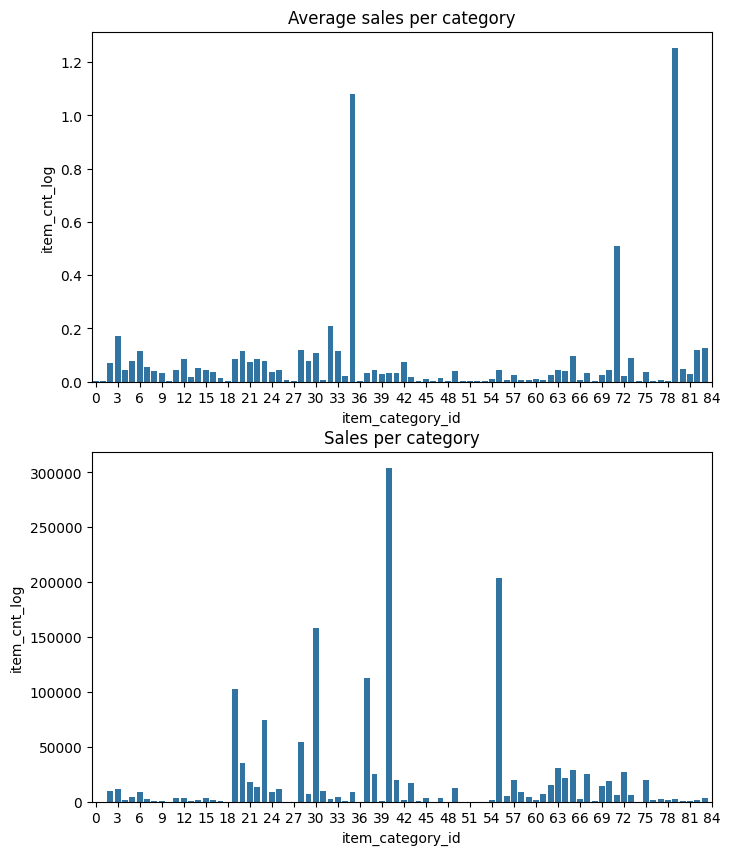

In [52]:
group = df_train.groupby('item_category_id').agg({'item_cnt_month_log':['sum', 'mean']}).reset_index()

figure, ax = plt.subplots(2, 1, figsize = (8,10))

length = len(group) + 1

sns.barplot(x = group['item_category_id'], y = group['item_cnt_month_log', 'mean'], ax = ax[0]).set_title('Average sales per category')

sns.barplot(x = group['item_category_id'], y = group['item_cnt_month_log', 'sum'], ax = ax[1]).set_title('Sales per category')

ax[0].set_ylabel('item_cnt_log')

ax[1].set_ylabel('item_cnt_log')


plt.setp(ax, xticks=np.arange(0, length, 3), xticklabels=np.arange(0, length, 3),)
plt.show()

In [53]:
df_items.loc[df_items.item_category_id == 40]['item_id'].nunique()

5035

In [54]:
df_item_categories['minor_category'] = df_item_categories['item_category_name'].str.split(' - ').apply(lambda x: x[1] if len(x) > 1 else x[0])
df_item_categories['minor_category_id'] = encoder.fit_transform(df_item_categories['minor_category'])
df_item_categories.head()

,item_category_name,item_category_id,main_category,main_category_id,minor_category,minor_category_id
0,PC - Гарнитуры/Наушники,0,PC,0,Гарнитуры/Наушники,31
1,Аксессуары - PS2,1,Аксессуары,1,PS2,11
2,Аксессуары - PS3,2,Аксессуары,1,PS3,12
3,Аксессуары - PS4,3,Аксессуары,1,PS4,13
4,Аксессуары - PSP,4,Аксессуары,1,PSP,15


In [55]:
category_set = df_item_categories[['item_category_id', 'main_category_id', 'minor_category_id']]
df_train = pd.merge(category_set, df_train, on = 'item_category_id', how = 'left')
df_train.head()

,item_category_id,main_category_id,minor_category_id,date_block_num,shop_id,item_id,item_cnt_month,item_price,item_cnt_month_log,item_price_log,month,year,shop_id_encoded,city_id,revenue_log
0,0,0,31,0,2,16255,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
1,0,0,31,0,2,16256,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
2,0,0,31,0,2,16257,0.0,0.0,0.0,0.0,1,2013,0,29,0.0
3,0,0,31,0,3,16255,0.0,0.0,0.0,0.0,1,2013,1,29,0.0
4,0,0,31,0,3,16256,0.0,0.0,0.0,0.0,1,2013,1,29,0.0


In [56]:
group1 = df_train.groupby('main_category_id').agg({'item_cnt_month_log': 'sum'}).reset_index()
group2 = df_train.groupby('minor_category_id').agg({'item_cnt_month_log': 'sum'}).reset_index()

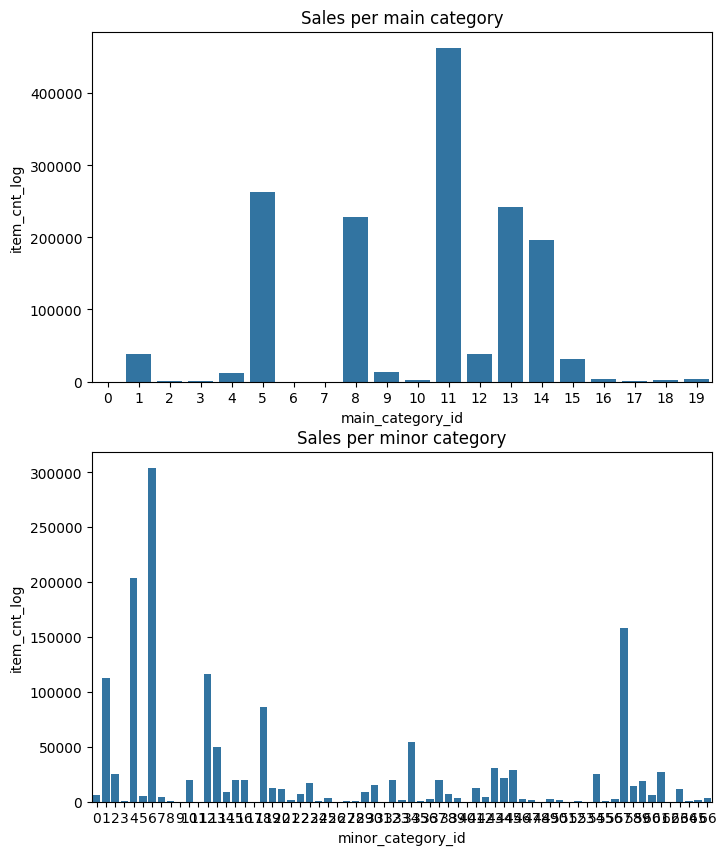

In [59]:
figure, ax = plt.subplots(2, 1, figsize = (8,10))

sns.barplot(x = group1['main_category_id'], y = group1['item_cnt_month_log'], ax = ax[0]).set_title('Sales per main category')

sns.barplot(x = group2['minor_category_id'], y = group2['item_cnt_month_log'], ax = ax[1]).set_title('Sales per minor category')

ax[0].set_ylabel('item_cnt_log')

ax[1].set_ylabel('item_cnt_log')

plt.show()

Correlation

In [67]:
df_train.columns

Index(['item_category_id', 'main_category_id', 'minor_category_id',
       'date_block_num', 'shop_id', 'item_id', 'item_cnt_month', 'item_price',
       'item_cnt_month_log', 'item_price_log', 'month', 'year',
       'shop_id_encoded', 'city_id', 'revenue_log'],
      dtype='object')

In [68]:
categorical = ['date_block_num', 'shop_id_encoded', 'item_id', 'item_category_id',
              'main_category_id', 'minor_category_id', 'city_id', 'month', 'year']

numerical = ['revenue_log', 'item_price_log']

target = ['item_cnt_month']

In [66]:
columns, correlations = [], []

for col in numerical:
    columns.append(col)
    correlations.append(stats.spearmanr(df_train[col], df_train['item_cnt_month_log'])[0])

num_corr = pd.DataFrame({'column': columns, 'correlation': correlations})

num_corr.style.background_gradient()

,column,correlation
0,revenue_log,0.999810
1,item_price_log,0.998795


In [69]:
for category in categorical:
    correlation_ratio(df_train['item_cnt_month_log'], df_train[category], category)

Correlation between sales and date_block_num
Eta_squared: 0.0015
Eta: 0.0389
Correlation between sales and shop_id_encoded
Eta_squared: 0.0007
Eta: 0.0269
Correlation between sales and item_id
Eta_squared: 0.0006
Eta: 0.0253
Correlation between sales and item_category_id
Eta_squared: 0.0042
Eta: 0.0644
Correlation between sales and main_category_id
Eta_squared: 0.0054
Eta: 0.0736
Correlation between sales and minor_category_id
Eta_squared: 0.0019
Eta: 0.0432
Correlation between sales and city_id
Eta_squared: 0.0004
Eta: 0.0202
Correlation between sales and month
Eta_squared: 0.0001
Eta: 0.0081
Correlation between sales and year
Eta_squared: 0.0015
Eta: 0.0384


In [71]:
data = df_train[['item_category_id', 'main_category_id', 'minor_category_id',
       'date_block_num', 'item_id','item_cnt_month_log', 'item_price_log', 'month', 'year',
       'shop_id_encoded', 'city_id', 'revenue_log']]

In [73]:
to_csv(data, 'data.csv')